### 1. Create a function to read the data

In [1]:
import numpy as np
import csv

def read_data(r_file, w_file):
    with open(r_file, 'r') as dat_file:
        with open(w_file, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            for row in dat_file:
                row = [value.strip() for value in row.split('|')]
                csv_writer.writerow(row)
         
    csv_file_r = open(w_file)
    reader = csv.reader(csv_file_r)
    data_list = list(reader)

    for i in range(69):
        data_list.remove(data_list[0])
    
    for row in data_list:
        row[0] = [value.strip() for value in row[0].split(' ')]
        while '' in row[0]:
            row[0].remove('')
            
    return data_list


To read the data, and transform them to numpy array

In [2]:
rd = read_data('BerkeleyEarth_GlobalLandTemperature.dat', 'test_file.csv')

year = []
month = []
m_an = []
m_un = []
ty_an = []
ty_un = []

for row in rd:
    year.append(int(row[0][0]))
    month.append(int(row[0][1]))
    m_an.append(float(row[0][2]))
    m_un.append(float(row[0][3]))
    ty_an.append(float(row[0][8]))
    ty_un.append(float(row[0][9]))
    
year = np.array(year)
month = np.array(month)
m_an = np.array(m_an)
m_un = np.array(m_un)
ty_an = np.array(ty_an)
ty_un = np.array(ty_un)

# to build x-axis, I create a new array
x_axis = year+month/12.


### 2. Plot the data

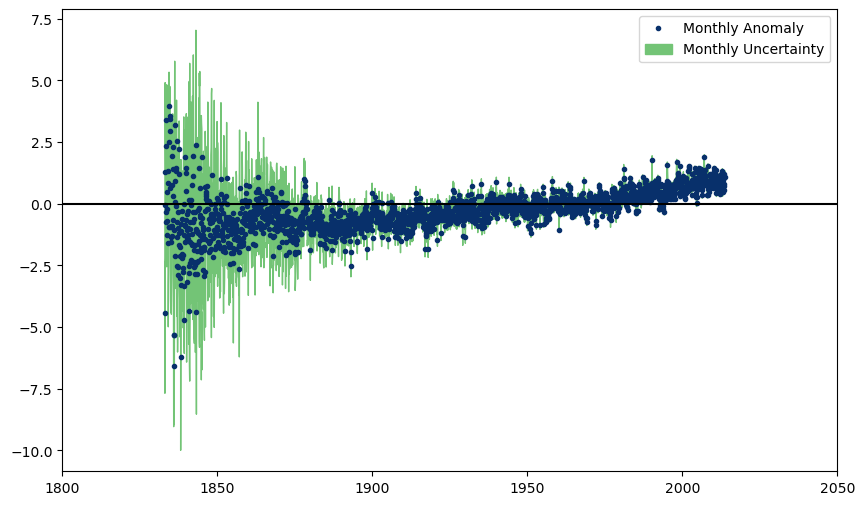

In [6]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,6])
plt.xlim(1800,2050)
plt.plot(x_axis, m_an, marker=".", ls="None", color =plt.cm.Blues(1.3,1.0), label = 'Monthly Anomaly')
plt.fill_between(x_axis, m_an-m_un, m_an+m_un, color=plt.cm.Greens(0.5,1.4), label = 'Monthly Uncertainty')
plt.legend(loc="upper right")
plt.axhline(0, ls="-",color="k")

plt.show()

### 3. Create a weighted mean method 

In [11]:
# I create a function, called weighted mean

def weighted_mean(data, error):
    
    data = list(data)
    error = list(error)

    for i in range(len(data)):
        index = np.argmax(data)    
        if data[index] <= 20:
            break
        if i == index:
            data[i] = -1000
            error[i] = -1000
        
    while -1000 in data:
        data.remove(-1000)
        error.remove(-1000)
    # remove nan from the data
    
    for i in range(len(error)):
        index = np.argmax(error)    
        if error[index] <= 20:
            break
        if i == index:
            error[i] = -1000
            data[i] = -1000
        
    while -1000 in error:
        error.remove(-1000)
        data.remove(-1000)
    # remove nan from the error
    
    data = np.array(data)
    error = np.array(error)
    
    weight = 1/error**2
    weight_mean = np.sum(data*weight)/np.sum(weight)
    weight_error = np.sqrt(1/np.sum(weight))
    
    return weight_mean, weight_error

### 4. Plot the evolution of the temperture based on weighted mean data

In [12]:
# create data based on ten year

y_unique = np.unique(year)
y_ten_year = y_unique[::10]

w_array = np.asarray([weighted_mean(m_an[(year>=s) & (year<e)], m_un[(year>=s) & (year<e)]) 
                      for s,e in zip(y_ten_year[:-1], y_ten_year[1:])])

wm, we = w_array.T

plot the figure

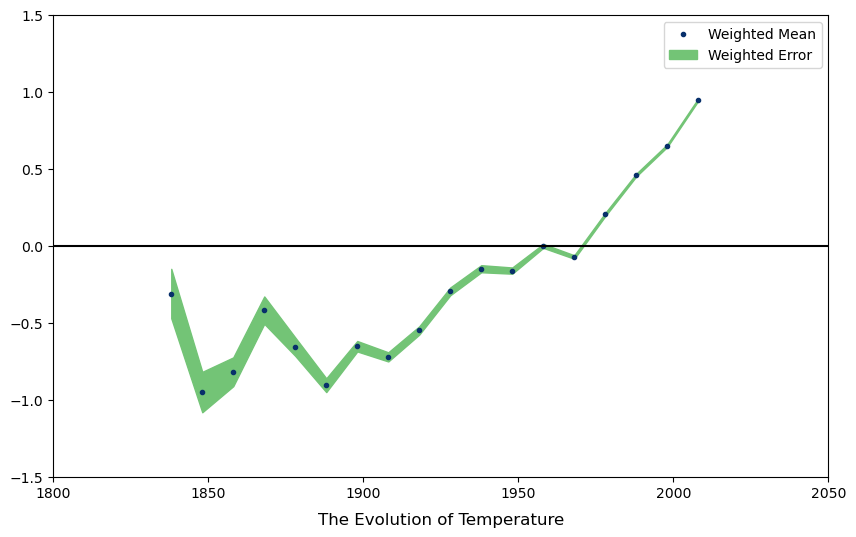

In [13]:
fig = plt.figure(figsize=[10,6])
plt.title("The Evolution of Temperature", y =-0.12)
plt.xlim(1800,2050)
plt.ylim(-1.5,1.5)
x_midpoint = np.mean([y_ten_year[:-1], y_ten_year[1:]], axis=0)
plt.plot(x_midpoint, wm, marker=".", ls="None", color = plt.cm.Blues(1.3,1.0), label ='Weighted Mean')
plt.fill_between(x_midpoint, wm-we, wm+we, color=plt.cm.Greens(0.5,1.4), label = 'Weighted Error')
plt.legend(loc="upper right")
plt.axhline(0, ls="-",color="k")

plt.show()